In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

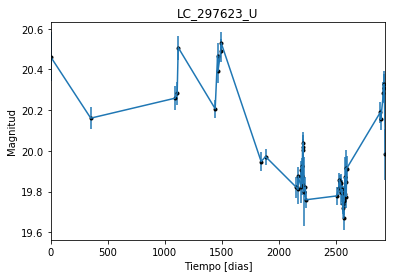

In [2]:
data = np.genfromtxt('LC_297623_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_297623_U')
plt.savefig("LC_297623_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

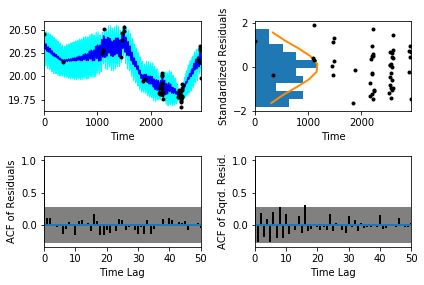

In [5]:
sample.assess_fit()

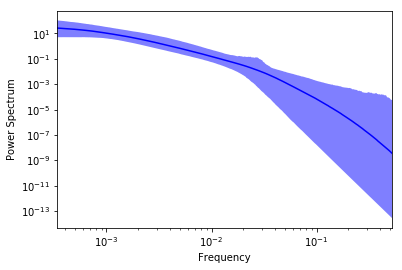

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

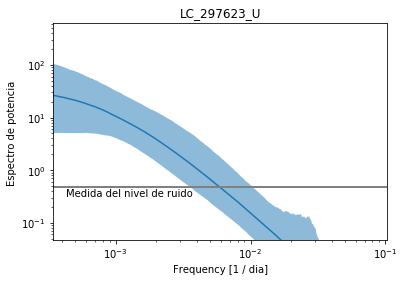

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_297623_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_297623_U')

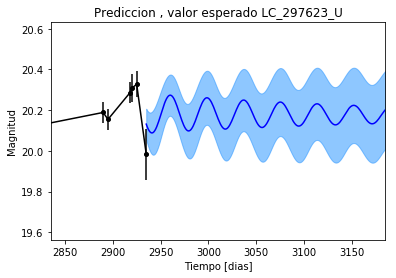

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_297623_U')

Text(0.5,1,'Prediccion, Caminos simulados_LC_297623_U')

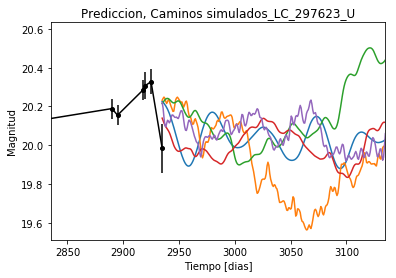

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_297623_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


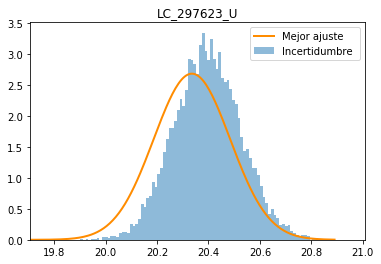

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_297623_U')
plt.savefig("Mejor_ajuste_LC_297623_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_297623_U')

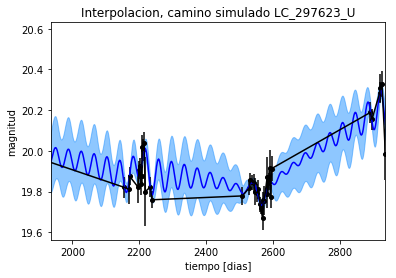

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_297623_U')

Text(0.5,1,'Interpolacion, camino simulado LC_297623_U')

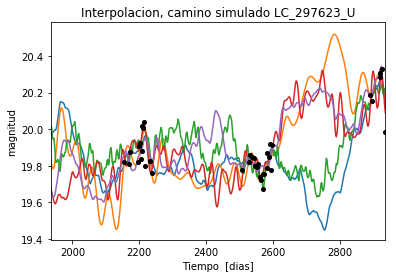

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_297623_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 623.514326268
Median: 0.0256407241863
Standard deviation: 0.212916900312
68% credibility interval: [ 0.00264837  0.24338725]
95% credibility interval: [  5.49537349e-04   8.29375247e-01]
99% credibility interval: [  3.75631038e-04   9.90985237e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 644.298392392
Median: 0.00911664576241
Standard deviation: 0.124426452405
68% credibility interval: [ 0.00100505  0.0841154 ]
95% credibility interval: [  3.97976591e-04   4.36942328e-01]
99% credibility interval: [  3.51670864e-04   8.29375247e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 669.571199769
Median: 0.0617486473107


In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1184.48553639
Median: 65.8130403382
Standard deviation: 1.76897765926
68% credibility interval: [ 63.82627632  67.08042205]
95% credibility interval: [ 61.2823126   68.19627396]
99% credibility interval: [ 59.15331508  69.05362445]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 639.398363311
Median: 1.25329980117
Standard deviation: 2.51626235361
68% credibility interval: [ 0.21055464  4.83701918]
95% credibility interval: [ 0.0495932   8.90649148]
99% credibility interval: [  0.02627636  11.67350845]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 803.897429538
Median: 1.8141092605
Standard deviation: 11.2207607761
68% credibility interval: [  0.09334158  14.5762957 ]
95% credibility interval: [  1.65024815e-

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1747.65521081
Median: 5.43491846446e-30
Standard deviation: 3.48828724171e+75
68% credibility interval: [  2.27273904e-79   4.71157624e-07]
95% credibility interval: [  2.73775920e-142   4.60232653e+008]
99% credibility interval: [  8.24849600e-167   7.98961726e+057]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3314.25812226
Median: 20.1378532577
Standard deviation: 0.127880139855
68% credibility interval: [ 20.02601598  20.25954725]
95% credibility interval: [ 19.89919771  20.40753184]
99% credibility interval: [ 19.77918472  20.5508474 ]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 455.144866194
Median: 0.038967134886
Standard deviation: 0.270476168346
68% credibility interval: [ 0.         0.4937572]
95% credibility interval: [ 0.          0.92422087]
99% credibility interval: [ 0.          1.01229514]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 455.144866194
Median: 0.038967134886
Standard deviation: 0.270476168346
68% credibility interval: [ 0.         0.4937572]
95% credibility interval: [ 0.          0.92422087]
99% credibility interval: [ 0.          1.01229514]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1928.5219012
Median: 0.0
Standard deviation: 0.00044313506293
68% credibilit

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1184.48553639
Median: 65.8130403382
Standard deviation: 1.76897765926
68% credibility interval: [ 63.82627632  67.08042205]
95% credibility interval: [ 61.2823126   68.19627396]
99% credibility interval: [ 59.15331508  69.05362445]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1022.52421961
Median: 0.0763952878966
Standard deviation: 0.0587590544299
68% credibility interval: [ 0.04793816  0.13178174]
95% credibility interval: [ 0.03224601  0.23176302]
99% credibility interval: [ 0.02572022  0.34900976]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2074.24468095
Median: 0.983772885126
Standard deviation: 0.176893696563
68% credibility interval: [ 0.83512444  1.17417778]
95% credibility interval: [ 0.71349497  1.41201694]
99% credibility interval: [ 0.65201347  1.57227254]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 593.864936142
Median: 0.00658842679
Standard deviation: 0.326044431722
68% credibility interval: [ 0.00022236  0.09620759]
95% credibility interval: [  2.29348217e-10   7.45340580e-01]
99% credibility interval: [  4.57443945e-61   2.30192565e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 623.514326268
Median: (-0.161105421473-1.82580356447j)
Standard deviation: 2.16283049783
68% credibility interval: [-1.52924722-1.80042667j -0.01664020-1.34533196j]
95% credibility interval: [ -5.21111837e+00-2.47909948j  -3.45284500e-03-0.16372567j]
99% credibility interval: [ -6.22654388e+00-5.11470268j  -2.36015942e-03-0.11534861j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 644.298392392
Median: (-0.0572815747052+0.0703884337134j)
Standard deviation: 1.87065210282
68% credibility interval: [-0.52851264+1.35256537j -0.00631493+0.10655792j]
95% credibility interval: [ -2.74538962e+00+5.99519302j  -2.50056067e-03+0.j        ]
99% credibility interval: [ -5.21111837e+00+2.47909948j  -2.20961321e-03+0.j        ]
Pos